In [1]:

# calculo de los valores de la resistecnis al corte del terreno bajo el terraplen


import funcionesCalculo as ft
import numpy as np
import matplotlib.pyplot as plt

# importacion de datos del terreno
espesor,cotas,az,nivel_freatico,pe_seco,pe_saturado,E,poisson,cohesion,fi,cc,e0,tipo_datos=ft.datos_terreno()
# importación de los datos del terraplen y del mallado obtenido de la excel datos_terraplen.xlsx
a,b,h,q,ax,incrx,incrz=ft.datos_terraplen()
zcoord=np.arange(0.0001,az+incrz,incrz)


In [8]:
nivel_freatico

6

In [3]:
cohesion

[0, 15, 15, 20]

In [9]:
nivelfr=6
z=48

# calculo de un valor determinado para testeo
valor_presion=ft.presion_total(cotas,nivelfr,pe_saturado,pe_seco,z)
valor_presion_poro=ft.n_freatico(nivelfr,z)*9.81
valor_presion_efectiva=valor_presion-valor_presion_poro
print("El valor de la presion efectiva es {0:.2f} kN/m2".format(valor_presion_efectiva))

El valor de la presion efectiva es 583.98 kN/m2


In [2]:
# calculo de la resistencia al corte del terreno 

for z in zcoord:
    valor_presion=ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,z)
    valor_presion_poro=ft.n_freatico(nivel_freatico,z)*9.81
    valor_presion_efectiva=valor_presion-valor_presion_poro
    print("El valor de la presion efectiva a la cota {0:.2f} es {1:.2f} kN/m2".format(z,valor_presion_efectiva))
    cohesion_ter=cohesion[ft.parametro_terreno(cotas,z)]
    print("El valor de la cohesion a la cota {0:.2f} es {1:.2f} kN/m2".format(z,cohesion_ter))
    fi_ter=fi[ft.parametro_terreno(cotas,z)]
    print("El valor de fi a la cota {0:.2f} es {1:.2f} º".format(z,fi_ter))
    res_corte=cohesion_ter+valor_presion_efectiva*np.tan(np.deg2rad(fi_ter))
    print("El valor de la resistencia al corte a la cota {0:.2f} es {1:.2f} kN/m2".format(z,res_corte))
    

El valor de la presion efectiva a la cota 0.00 es 0.00 kN/m2
El valor de la cohesion a la cota 0.00 es 15.00 kN/m2
El valor de fi a la cota 0.00 es 25.00 º
El valor de la resistencia al corte a la cota 0.00 es 15.00 kN/m2
El valor de la presion efectiva a la cota 0.25 es 4.00 kN/m2
El valor de la cohesion a la cota 0.25 es 15.00 kN/m2
El valor de fi a la cota 0.25 es 25.00 º
El valor de la resistencia al corte a la cota 0.25 es 16.87 kN/m2
El valor de la presion efectiva a la cota 0.50 es 8.00 kN/m2
El valor de la cohesion a la cota 0.50 es 15.00 kN/m2
El valor de fi a la cota 0.50 es 25.00 º
El valor de la resistencia al corte a la cota 0.50 es 18.73 kN/m2
El valor de la presion efectiva a la cota 0.75 es 12.00 kN/m2
El valor de la cohesion a la cota 0.75 es 15.00 kN/m2
El valor de fi a la cota 0.75 es 25.00 º
El valor de la resistencia al corte a la cota 0.75 es 20.60 kN/m2
El valor de la presion efectiva a la cota 1.00 es 16.00 kN/m2
El valor de la cohesion a la cota 1.00 es 15.00 k

In [3]:
def resistencia_MC(cotas,valor_presion,cohesion,fi,z):
    # calculo de la resisencia al corte en un punto del terreno
    # el valor de la presion puede ser en totales o en efectivas

    # cálculo de la cohesión y el ángulo de rozamiento
    cohesion_ter=cohesion[ft.parametro_terreno(cotas,z)]
    fi_ter=fi[ft.parametro_terreno(cotas,z)]
    
    # valor de la resistencia al corte 
    res_corte=cohesion_ter+valor_presion*np.tan(np.deg2rad(fi_ter))

    return res_corte



resistencia_MC(cotas,valor_presion,cohesion,fi,z)


732.4082485134551

In [4]:
resistencia_MC(cotas,valor_presion,cohesion,fi,z)

732.4082485134551

In [21]:
ft.resistencia_MC(cotas,valor_presion,cohesion,fi,z)


286.87798514962157

In [35]:
cohesion_ter+valor_presion_efectiva*np.tan(np.deg2rad(fi_ter))

176.47729602599262

El valor de la resistencia al corte a la cota 0.00 es 15.00 kN/m2
El valor de la resistencia al corte a la cota 0.25 es 16.87 kN/m2
El valor de la resistencia al corte a la cota 0.50 es 18.73 kN/m2
El valor de la resistencia al corte a la cota 0.75 es 20.60 kN/m2
El valor de la resistencia al corte a la cota 1.00 es 22.46 kN/m2
El valor de la resistencia al corte a la cota 1.25 es 24.33 kN/m2
El valor de la resistencia al corte a la cota 1.50 es 26.19 kN/m2
El valor de la resistencia al corte a la cota 1.75 es 28.06 kN/m2
El valor de la resistencia al corte a la cota 2.00 es 29.92 kN/m2
El valor de la resistencia al corte a la cota 2.25 es 31.79 kN/m2
El valor de la resistencia al corte a la cota 2.50 es 33.65 kN/m2
El valor de la resistencia al corte a la cota 2.75 es 35.52 kN/m2
El valor de la resistencia al corte a la cota 3.00 es 37.38 kN/m2
El valor de la resistencia al corte a la cota 3.25 es 39.25 kN/m2
El valor de la resistencia al corte a la cota 3.50 es 41.11 kN/m2
El valor d

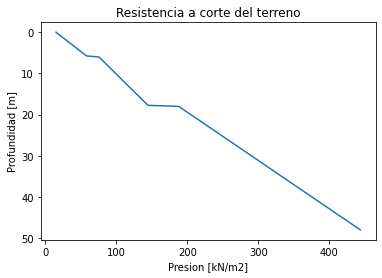

In [21]:
# calculo de la resistencia al corte del terreno 
resistencia=[]
profundidad=[]

for z in zcoord:
    valor_presion=ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,z)
    valor_presion_poro=ft.n_freatico(nivel_freatico,z)*9.81
    valor_presion_efectiva=valor_presion-valor_presion_poro
    cohesion_ter=cohesion[ft.parametro_terreno(cotas,z)]
    fi_ter=fi[ft.parametro_terreno(cotas,z)]
    res_corte=cohesion_ter+valor_presion_efectiva*np.tan(np.deg2rad(fi_ter))
    resistencia.append(res_corte)
    profundidad.append(z)
    print("El valor de la resistencia al corte a la cota {0:.2f} es {1:.2f} kN/m2".format(z,res_corte))
    
    
# representación grafica de la ley de resistencia al corte 
plt.plot(resistencia,profundidad)
plt.gca().invert_yaxis()
plt.title('Resistencia a corte del terreno')
plt.xlabel('Presion [kN/m2]')
plt.ylabel('Profundidad [m]')
plt.show() 